## Experiments for Report

This noteboook contains various example experiments that I performed during the project. Results from these experiments were used in the final report.

In [1]:
import pandas as pd
import scipy.stats as ss
import numpy as np
from Part1_Classifier.data_preprocessing import main, clean_data
from sklearn.metrics import normalized_mutual_info_score

%cd Part1_Classifier

/home/manoj/Github_Repos/TakeHomeProject_OCT2025/JPMC-TakeHome/Part1_Classifier


### Few Examples on Data Analysis and Feature Engineering

**Cramer's V correlation and Normalized Mutual Information (NMI) calculations for feature selection and analysis**

In [2]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

df = clean_data()
industry_score = cramers_v(df['major industry code'], df['detailed industry recode'])
occupation_score = cramers_v(df['major occupation code'], df['detailed occupation recode'])

print(f"Industry Correlation (Cramer's V): {industry_score:.4f}")
print(f"Occupation Correlation (Cramer's V): {occupation_score:.4f}")


nmi_score_industry_major = normalized_mutual_info_score(df['major industry code'], df['label'])
nmi_score_industry_detailed = normalized_mutual_info_score(df['detailed industry recode'], df['label'])
print(f"NMI between Major Industry Code and Label: {nmi_score_industry_major:.4f}")
print(f"NMI between Detailed Industry Recode and Label: {nmi_score_industry_detailed:.4f}")

nmi_score_occupation_major = normalized_mutual_info_score(df['major occupation code'], df['label'])
nmi_score_occupation_detailed = normalized_mutual_info_score(df['detailed occupation recode'], df['label'])
print(f"NMI between Major Occupation Code and Label: {nmi_score_occupation_major:.4f}")
print(f"NMI between Detailed Occupation Recode and Label: {nmi_score_occupation_detailed:.4f}")

Industry Correlation (Cramer's V): 1.0000
Occupation Correlation (Cramer's V): 1.0000
NMI between Major Industry Code and Label: 0.0321
NMI between Detailed Industry Recode and Label: 0.0305
NMI between Major Occupation Code and Label: 0.0512
NMI between Detailed Occupation Recode and Label: 0.0483


**Missing data analysis on migration feature columns**

In [3]:
# List of migration columns
migration_cols = [
    'migration code-change in msa', 
    'migration code-change in reg', 
    'migration code-move within reg', 
    'migration prev res in sunbelt'
]

print("--- Migration Column Analysis ---")
print(f"Total Observations: {len(df)}")

for col in migration_cols:

    counts = df[col].value_counts()
    n_not_in_universe = counts.get('Not in universe', 0)
    n_unknown = counts.get('Unknown', 0)

    total_bad = n_not_in_universe + n_unknown
    percent_bad = (total_bad / len(df)) * 100
    
    print(f"\nFeature: {col}")
    print(f" - 'Not in universe': {n_not_in_universe:,}")
    print(f" - 'Unknown': {n_unknown:,}")
    print(f" - Total Missing/Irrelevant: {total_bad:,} ({percent_bad:.2f}%)")

    print(normalized_mutual_info_score(df[col], df['label']))

--- Migration Column Analysis ---
Total Observations: 199523

Feature: migration code-change in msa
 - 'Not in universe': 1,516
 - 'Unknown': 99,696
 - Total Missing/Irrelevant: 101,212 (50.73%)
0.0017439806054100236

Feature: migration code-change in reg
 - 'Not in universe': 1,516
 - 'Unknown': 99,696
 - Total Missing/Irrelevant: 101,212 (50.73%)
0.001614995065420676

Feature: migration code-move within reg
 - 'Not in universe': 1,516
 - 'Unknown': 99,696
 - Total Missing/Irrelevant: 101,212 (50.73%)
0.0016095697936292625

Feature: migration prev res in sunbelt
 - 'Not in universe': 84,054
 - 'Unknown': 99,696
 - Total Missing/Irrelevant: 183,750 (92.09%)
0.0008020573870355947


In [4]:
# List of migration columns
migration_cols = [
    'region of previous residence',
    'state of previous residence',
]

print("--- Migration Column Analysis ---")
print(f"Total Observations: {len(df)}")

for col in migration_cols:

    counts = df[col].value_counts()
    n_not_in_universe = counts.get('Not in universe', 0)
    n_unknown = counts.get('Unknown', 0)

    total_bad = n_not_in_universe + n_unknown
    percent_bad = (total_bad / len(df)) * 100
    
    print(f"\nFeature: {col}")
    print(f" - 'Not in universe': {n_not_in_universe:,}")
    print(f" - 'Unknown': {n_unknown:,}")
    print(f" - Total Missing/Irrelevant: {total_bad:,} ({percent_bad:.2f}%)")

    print(normalized_mutual_info_score(df[col], df['label']))

--- Migration Column Analysis ---
Total Observations: 199523

Feature: region of previous residence
 - 'Not in universe': 183,750
 - 'Unknown': 0
 - Total Missing/Irrelevant: 183,750 (92.09%)
0.0015825752876825533

Feature: state of previous residence
 - 'Not in universe': 183,750
 - 'Unknown': 708
 - Total Missing/Irrelevant: 184,458 (92.45%)
0.0016833101364700366


### Classifier Results Visualizations

**Feature importance plotting**

/tmp/ipykernel_67364/4238064515.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


Plot saved as plots_and_metadata/feature_importance_plot.png


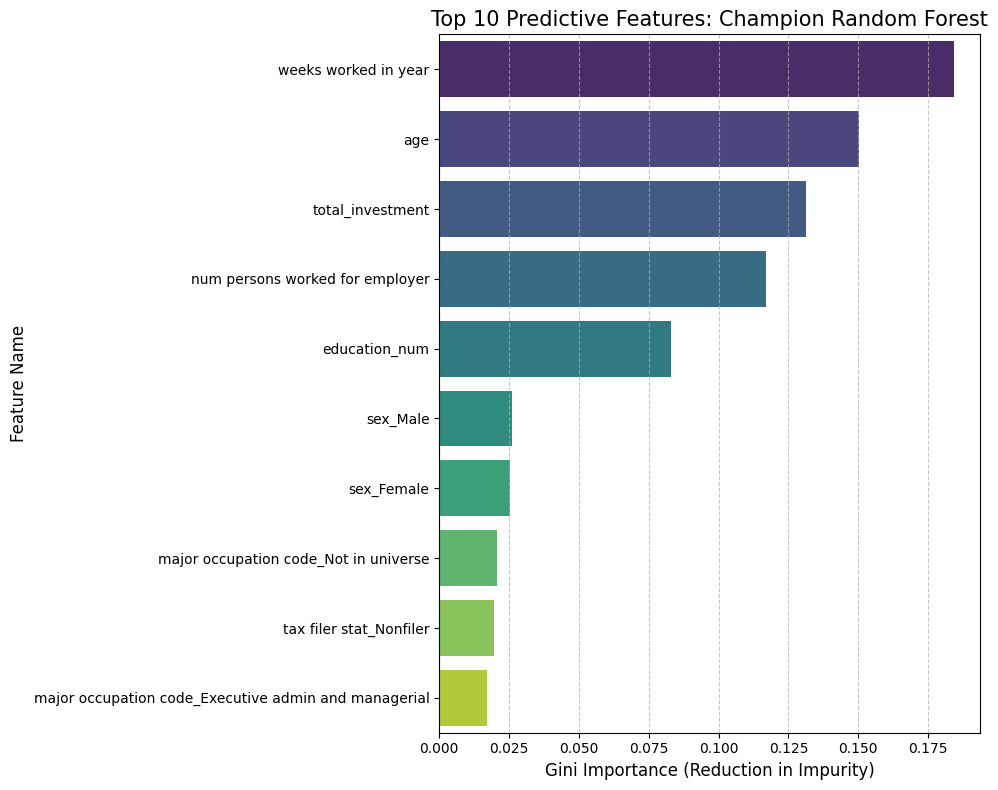

In [12]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Loadinf the model and the feature list used during training
model = joblib.load('../champion_income_classifier_model.pkl')

feature_names = model.feature_names_in_ 

# Extracting Importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Predictive Features: Champion Random Forest', fontsize=15)
plt.xlabel('Gini Importance (Reduction in Impurity)', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Saving the plot
os.makedirs('../plots_and_metadata', exist_ok=True)
plt.savefig('../plots_and_metadata/feature_importance_plot.png', dpi=300)
print("Plot saved as plots_and_metadata/feature_importance_plot.png")

**Precision-Recall Curve Visualization**

PR Curve saved! Average Precision: 0.5902


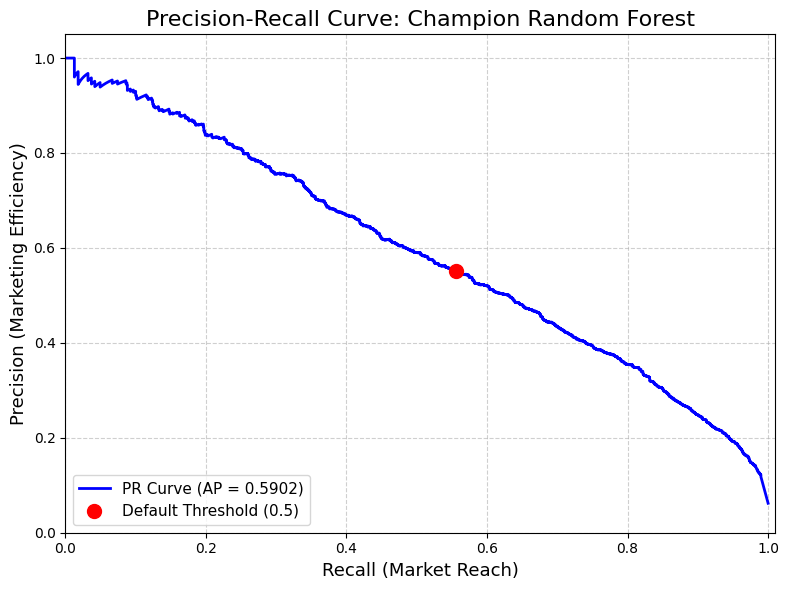

In [13]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Loading the model and features
model = joblib.load('../champion_income_classifier_model.pkl')

# Loading Top 14 features list
with open('../processed_datas/top_14_features.columns', 'r') as f:
    top_14 = [line.strip() for line in f]

# Loading test data
test_df = pd.read_csv('../processed_datas/census_test.csv')
X_test = pd.get_dummies(test_df[top_14])
y_test = test_df['label']

# Re-aligning features to match training (ensuring columns are in the same order)
X_test = X_test.reindex(columns=model.feature_names_in_, fill_value=0)

# Getting Probability Scores for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Calculating Precision-Recall Metrics
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plotting the Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR Curve (AP = {avg_precision:.4f})')

# Marking the current 0.5 threshold performance
import numpy as np
idx = np.argmin(np.abs(thresholds - 0.5))
plt.plot(recall[idx], precision[idx], 'ro', markersize=10, label=f'Default Threshold (0.5)')

# Plot formatting
plt.title('Precision-Recall Curve: Champion Random Forest', fontsize=16)
plt.xlabel('Recall (Market Reach)', fontsize=13)
plt.ylabel('Precision (Marketing Efficiency)', fontsize=13)
plt.legend(loc='lower left', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.05])
plt.tight_layout()

# Saving the plot
os.makedirs('../plots_and_metadata', exist_ok=True)
plt.savefig('../plots_and_metadata/precision_recall_curve.png', dpi=300)
print(f"PR Curve saved! Average Precision: {avg_precision:.4f}")

### PCA and KMeans Clustering Visualizations

In [2]:
%cd ../Part2_Segmentation

/home/manoj/Github_Repos/TakeHomeProject_OCT2025/JPMC-TakeHome/Part2_Segmentation


**PCA Component Analysis**

In [5]:
from pca_dimensionality_reduction import pca_dimensionality_reduction

pca_full, X_scaled, n_components_70, df_full, X = pca_dimensionality_reduction()
X_pca_optimized = pca_full.transform(X_scaled)[:, :9]

# Getting the feature names
feature_names = X.columns

# Creating a DataFrame of Loadings
# Transpose so rows = features, cols = PC1, PC2...
loadings = pd.DataFrame(
    pca_full.components_.T, 
    columns=[f'PC{i+1}' for i in range(pca_full.n_components_)], 
    index=feature_names
)

# Analyzing PC1 (The Primary Driver)
print("\n--- PC1 (Top 5 Drivers) ---")
# We look at absolute value to see strength, regardless of positive/negative direction
print(loadings['PC1'].abs().sort_values(ascending=False).head(5))

print("\n-> Directionality of PC1:")
print("   Positive side correlates with:\n", loadings['PC1'].sort_values(ascending=False).head(4).index.tolist())
print("   Negative side correlates with:\n", loadings['PC1'].sort_values(ascending=True).head(4).index.tolist())

# Analyzing PC2 (The Secondary Driver)
print("\n--- PC2 (Top 5 Drivers) ---")
print(loadings['PC2'].abs().sort_values(ascending=False).head(5))

print("\n-> Directionality of PC2:")
print("   Positive side correlates with:\n", loadings['PC2'].sort_values(ascending=False).head(4).index.tolist())
print("   Negative side correlates with:\n", loadings['PC2'].sort_values(ascending=True).head(4).index.tolist())

22 features available for PCA.
PCA Components required for 70% variance: 9

--- PC1 (Top 5 Drivers) ---
family_status_cat_parent present    0.434372
veterans benefits                   0.432490
education_num                       0.432420
weeks worked in year                0.367213
num persons worked for employer     0.331181
Name: PC1, dtype: float64

-> Directionality of PC1:
   Positive side correlates with:
 ['family_status_cat_parent present', 'member of a labor union_Not in universe', 'is_second_generation', 'family_status_cat_parent not present']
   Negative side correlates with:
 ['veterans benefits', 'education_num', 'weeks worked in year', 'num persons worked for employer']

--- PC2 (Top 5 Drivers) ---
race_White                                                        0.518893
race_Black                                                        0.402805
live in this house 1 year ago_Yes                                 0.316580
live in this house 1 year ago_Not in universe under 

**1. PC1 - "Life Stage and Workforce Engagement" axis**

This component seperates the Dependent Youth from the Established Workers.
- **Positive side**: Driven by `parent present` and `is_second_generation`.
    - These are children or students who still live with parents and are likely 2nd generation immigrants. They are not yet economic contributors.
- **Negative side**: Driven by `education_num` and `weeks worked in year`.
    - These are educated adults with steady jobs and are likely established workers.

**2. PC2 - "Demographic and Labor Type" axis**

This component captures a sociological split in the census data between Established Residents and Hourly/transient Populations.
- **Positive side**: Driven by `race_white` and `live in this house 1 year ago_Yes`.
    - This represents the majority demographic with residential stability (they haven't moved recently).
- **Negative side**: Driven by other race classes and `live in this house 1 year ago_No in universe under 1 year ago`.
    - This captures people for other demographic groups who are more likely to be paid hourly (rather than one time salary).

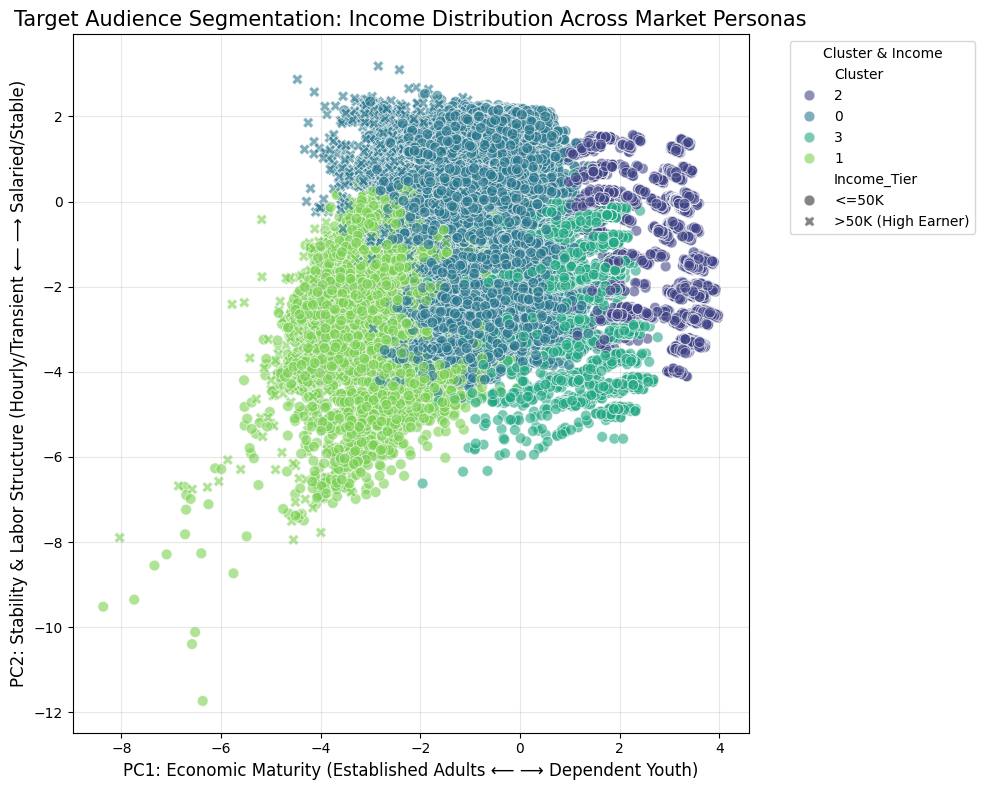

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns
import os
import matplotlib.pyplot as plt
import pandas as pd

# Creating a DataFrame for plotting
df_plot = pd.DataFrame(X_pca_optimized, columns=[f'PC{i+1}' for i in range(9)])
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
df_full['Cluster'] = kmeans.fit_predict(X_pca_optimized) # Using your optimal components
df_plot['Cluster'] = df_full['Cluster'].astype(str) # Treat as categorical for color
df_plot['Label'] = df_full['label'] # To see if high earners cluster together
df_plot['Income_Tier'] = df_plot['Label'].apply(lambda x: '>50K (High Earner)' if x == 1 else '<=50K')

# 2. Plot PC1 vs PC2
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Cluster',    # Color = Persona
    style='Income_Tier',    # Shape = Income (0 vs 1)
    data=df_plot, 
    palette='viridis', 
    alpha=0.6,
    s=60              # Make dots slightly bigger to see the shapes
)
plt.title('Target Audience Segmentation: Income Distribution Across Market Personas', fontsize=15)
plt.xlabel('PC1: Economic Maturity (Established Adults ⟵ ⟶ Dependent Youth)', fontsize=12)
plt.ylabel('PC2: Stability & Labor Structure (Hourly/Transient ⟵ ⟶ Salaried/Stable)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(title='Cluster & Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

os.makedirs('../plots_and_metadata', exist_ok=True)
plt.savefig('../plots_and_metadata/segmentation_clusters.png')
plt.show()